In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [36]:
def image_loader(img_dir, img_list):
    images = []
    for i, img_name in enumerate(img_list):
        if img_name.split('.')[1] == '.npy':
            image = np.load(img_dir+img_list)
            images.append(image)

    images = np.array(images)

    return images   

In [37]:
def loader(img_dir, img_list, mask_dir, mask_list, batch_size):
    n = len(img_list)

    while True:
        batch_start = 0
        batch_end = batch_size

        while batch_start < n:
            limit = min(batch_end, n)

            x = image_loader(img_dir, img_list[batch_start:limit])
            y = image_loader(mask_dir, mask_list[batch_start:limit])

            yield (x,y)

            batch_start += batch_size
            batch_end += batch_size

In [38]:
train_img_dir = "./data/BraTS2020_TrainingData/Input_Data/images/"
train_mask_dir = "./data/BraTS2020_TrainingData/Input_Data/masks/"

In [39]:
train_img_list = sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

In [40]:
print(len(train_img_list))
print(len(train_mask_list))

369
369


In [41]:
batch_size = 2

train_img_datagen = loader(train_img_dir, train_img_list,train_mask_dir, train_mask_list, batch_size)
train_img_datagen.__next__()

(array([], dtype=float64), array([], dtype=float64))

In [42]:
train_img_datagen.__next__()


(array([], dtype=float64), array([], dtype=float64))

In [43]:
random_img = random.randint(0, img.shape[0]-1)
test_img = img[random_img]
test_mask = img[random_img]
test_mask = np.argmax(test_mask, axis=3)

slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(test_img[:,:, slice, 0], cmap='grey')
plt.title("Flair Image")

plt.subplot(222)
plt.imshow(test_img[:,:, slice, 1], cmap='grey')
plt.title("T1 Image")

plt.subplot(223)
plt.imshow(test_img[:,:, slice, 2], cmap='grey')
plt.title("T2 Image")

plt.subplot(224)
plt.imshow(test_mask[:,:, slice])
plt.title("Mask")

plt.show()

ValueError: empty range for randrange() (0, 0, 0)

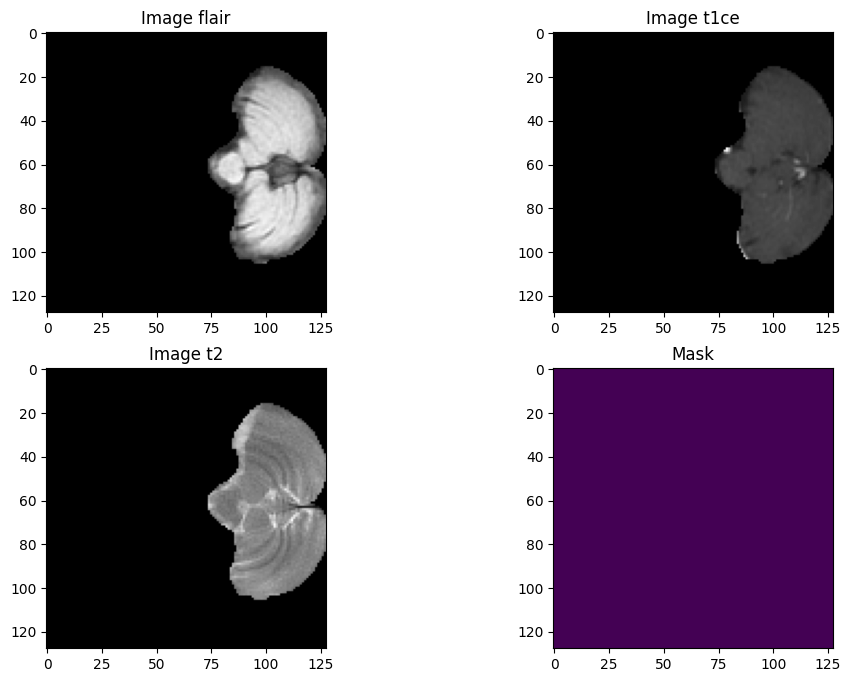

In [65]:
import os
import numpy as np

from matplotlib import pyplot as plt
import random









img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [55]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

image_189.npy
mask_189.npy


In [ ]:
train_img_dir = "./data/BraTS2020_TrainingData/Input_Data/images/"
train_mask_dir = "./data/BraTS2020_TrainingData/Input_Data/masks/"
train_img_list= os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

In [ ]:
train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

img, msk = train_img_datagen.__next__()